In [40]:
import tensorflow as tf

try:
    # Initialize the TPU
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("TPU detected:", tpu)
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    print("TPU initialized successfully")
except Exception as e:
    print("TPU initialization failed:", e)



TPU detected: <tensorflow.python.distribute.cluster_resolver.tpu.tpu_cluster_resolver.TPUClusterResolver object at 0x7e15f7eab7f0>
TPU initialized successfully


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.3/397.3 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.5/475.5 kB 22.5 MB/s eta 0:00:00


In [6]:
import os
import numpy as np
import pandas as pd
import h5py

data = pd.read_hdf('/content/drive/MyDrive/ML_Group7_WD/FallAllD.h5', 'df')

print(data.head())
print(data.shape)

   SubjectID Device  ActivityID  TrialNo  \
0          1   Neck          13        1   
1          1   Neck          13        2   
2          1   Neck          13        3   
3          1   Neck          13        4   
4          1   Neck          13        5   

                                                 Acc  \
0  [[4155, 55, -82], [4157, 55, -126], [4157, 50,...   
1  [[4002, -50, 156], [4002, -38, 172], [4003, -2...   
2  [[3983, 40, -335], [3984, 38, -324], [3987, 34...   
3  [[3959, 165, 197], [3953, 165, 196], [3951, 16...   
4  [[3750, -182, 252], [3767, -166, 259], [3781, ...   

                                                 Gyr  \
0  [[1613, 205, 77], [1626, 202, 74], [1634, 199,...   
1  [[-57, 58, 18], [-64, 57, 15], [-66, 51, 16], ...   
2  [[1651, 208, 63], [1652, 203, 60], [1656, 198,...   
3  [[-70, 73, 2], [-67, 80, 4], [-70, 89, 5], [-7...   
4  [[394, -59, 3], [397, -63, -1], [394, -66, -3]...   

                                                 Mag  \
0  [[

In [7]:
df = pd.DataFrame(data)
print(df.head())
print(df.shape)

   SubjectID Device  ActivityID  TrialNo  \
0          1   Neck          13        1   
1          1   Neck          13        2   
2          1   Neck          13        3   
3          1   Neck          13        4   
4          1   Neck          13        5   

                                                 Acc  \
0  [[4155, 55, -82], [4157, 55, -126], [4157, 50,...   
1  [[4002, -50, 156], [4002, -38, 172], [4003, -2...   
2  [[3983, 40, -335], [3984, 38, -324], [3987, 34...   
3  [[3959, 165, 197], [3953, 165, 196], [3951, 16...   
4  [[3750, -182, 252], [3767, -166, 259], [3781, ...   

                                                 Gyr  \
0  [[1613, 205, 77], [1626, 202, 74], [1634, 199,...   
1  [[-57, 58, 18], [-64, 57, 15], [-66, 51, 16], ...   
2  [[1651, 208, 63], [1652, 203, 60], [1656, 198,...   
3  [[-70, 73, 2], [-67, 80, 4], [-70, 89, 5], [-7...   
4  [[394, -59, 3], [397, -63, -1], [394, -66, -3]...   

                                                 Mag  \
0  [[

In [8]:
df.drop(columns=['SubjectID', 'TrialNo', 'Mag', 'Bar'], inplace=True)
print(df.head())
print(df.shape)

  Device  ActivityID                                                Acc  \
0   Neck          13  [[4155, 55, -82], [4157, 55, -126], [4157, 50,...   
1   Neck          13  [[4002, -50, 156], [4002, -38, 172], [4003, -2...   
2   Neck          13  [[3983, 40, -335], [3984, 38, -324], [3987, 34...   
3   Neck          13  [[3959, 165, 197], [3953, 165, 196], [3951, 16...   
4   Neck          13  [[3750, -182, 252], [3767, -166, 259], [3781, ...   

                                                 Gyr  
0  [[1613, 205, 77], [1626, 202, 74], [1634, 199,...  
1  [[-57, 58, 18], [-64, 57, 15], [-66, 51, 16], ...  
2  [[1651, 208, 63], [1652, 203, 60], [1656, 198,...  
3  [[-70, 73, 2], [-67, 80, 4], [-70, 89, 5], [-7...  
4  [[394, -59, 3], [397, -63, -1], [394, -66, -3]...  
(6605, 4)


In [9]:
# Select data where ActivityID is between 1-44 (Falls) and 101-135 (ADL)
df = df[(df['ActivityID'].between(1, 44)) | (df['ActivityID'].between(101, 135))]

# Create labels: 1 for Falls, 0 for ADL
df['Label'] = df['ActivityID'].apply(lambda x: 1 if 1 <= x <= 45 else 0)

# Drop the original ActivityID column if only 'Label' is needed
df = df.drop(columns=['ActivityID'])

In [10]:
print(df.head(10))
print(df.shape)

  Device                                                Acc  \
0   Neck  [[4155, 55, -82], [4157, 55, -126], [4157, 50,...   
1   Neck  [[4002, -50, 156], [4002, -38, 172], [4003, -2...   
2   Neck  [[3983, 40, -335], [3984, 38, -324], [3987, 34...   
3   Neck  [[3959, 165, 197], [3953, 165, 196], [3951, 16...   
4   Neck  [[3750, -182, 252], [3767, -166, 259], [3781, ...   
5   Neck  [[3896, -377, 789], [3893, -374, 785], [3886, ...   
6   Neck  [[3858, 553, 356], [3880, 541, 377], [3903, 52...   
7   Neck  [[3869, -444, 767], [3872, -447, 776], [3873, ...   
8   Neck  [[3108, 745, -374], [3249, 760, -382], [3400, ...   
9   Neck  [[3933, 78, 611], [3922, 77, 606], [3921, 74, ...   

                                                 Gyr  Label  
0  [[1613, 205, 77], [1626, 202, 74], [1634, 199,...      1  
1  [[-57, 58, 18], [-64, 57, 15], [-66, 51, 16], ...      1  
2  [[1651, 208, 63], [1652, 203, 60], [1656, 198,...      1  
3  [[-70, 73, 2], [-67, 80, 4], [-70, 89, 5], [-7...      

In [11]:
# Device Ont-Hot Encoding
device = df['Device']
device_encoded = pd.get_dummies(device, columns=['Device']).astype(int)
# df = pd.concat([df, device_encoded], axis=1)
# df.drop(columns=['Device'], inplace=True)
print(device_encoded.head())
print(device_encoded.shape)

   Neck  Waist  Wrist
0     1      0      0
1     1      0      0
2     1      0      0
3     1      0      0
4     1      0      0
(6605, 3)


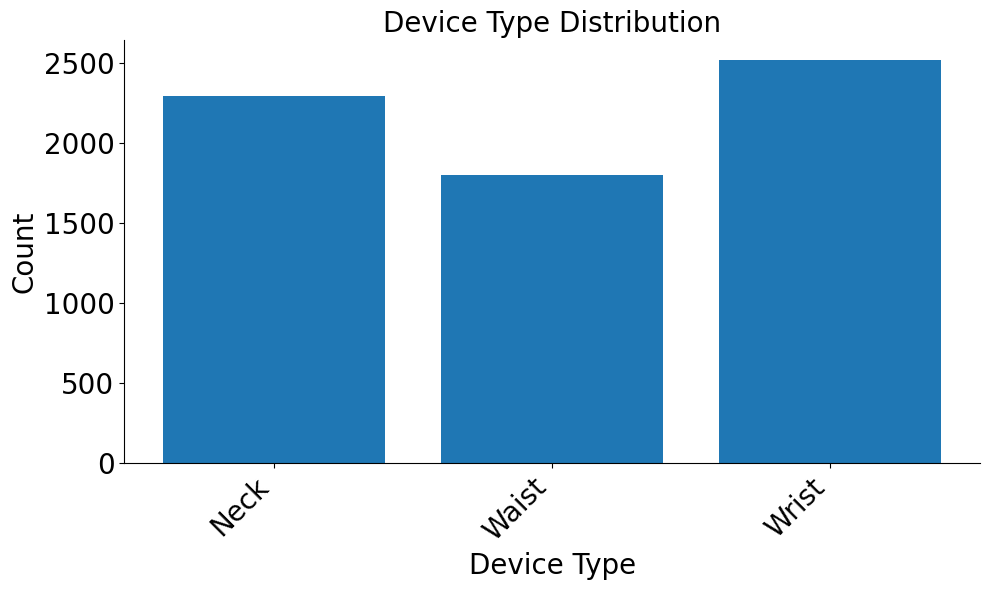

In [12]:
# prompt: visulize the device type distribution in one plot. no line on top or right, frameon=False for legend, fontsize=20 for all/

import matplotlib.pyplot as plt

# Assuming 'device_encoded' is your DataFrame with one-hot encoded device types
# Calculate the sum of each column to get the device type counts
device_counts = device_encoded.sum()

# Create a bar plot
plt.figure(figsize=(10, 6))

# Use device_counts.index to get device labels and device_counts.values to get counts
plt.bar(device_counts.index, device_counts.values)

plt.title('Device Type Distribution', fontsize=20)
plt.xlabel('Device Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=20, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize legend (if needed)
# plt.legend(frameon=False, fontsize=20)  # Uncomment if you need a legend

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [13]:
Acc_x = []
Acc_y = []
Acc_z = []
Gyr_x = []
Gyr_y = []
Gyr_z = []

# Efficiently extract x, y, z values
for _, row in df.iterrows():
    for val in row['Acc']:
      Acc_x.append(val[0])
      Acc_y.append(val[1])
      Acc_z.append(val[2])

    for val in row['Gyr']:
      Gyr_x.append(val[0])
      Gyr_y.append(val[1])
      Gyr_z.append(val[2])

print(len(Acc_x))
print(len(Acc_y))
print(len(Acc_z))
print(len(Gyr_x))
print(len(Gyr_y))
print(len(Gyr_z))


31439800
31439800
31439800
31439800
31439800
31439800


In [14]:
# prompt: printa few example of x,y,z

print(f"First 5 Acc_x values: {Acc_x[:5]}")
print(f"First 5 Acc_y values: {Acc_y[:5]}")
print(f"First 5 Acc_z values: {Acc_z[:5]}")
print(f"First 5 Gyr_x values: {Gyr_x[:5]}")
print(f"First 5 Gyr_y values: {Gyr_y[:5]}")
print(f"First 5 Gyr_z values: {Gyr_z[:5]}")

First 5 Acc_x values: [4155, 4157, 4157, 4152, 4150]
First 5 Acc_y values: [55, 55, 50, 46, 42]
First 5 Acc_z values: [-82, -126, -175, -221, -262]
First 5 Gyr_x values: [1613, 1626, 1634, 1632, 1623]
First 5 Gyr_y values: [205, 202, 199, 207, 213]
First 5 Gyr_z values: [77, 74, 70, 64, 61]


In [15]:
# get the number of rows, one row contains the data points for 20s * 280Hz
num_row = int(31439800/(20*238))
print(num_row)


6605


In [16]:
# Convert lists to NumPy arrays
Acc_x = np.array(Acc_x)
Acc_y = np.array(Acc_y)
Acc_z = np.array(Acc_z)
Gyr_x = np.array(Gyr_x)
Gyr_y = np.array(Gyr_y)
Gyr_z = np.array(Gyr_z)

# Reshape the arrays
if len(Acc_x) % 4760 != 0: # 4760 = 20*238
    print("Acc_x length is not divisible by 4760.")
else:
    Acc_x_reshaped = Acc_x.reshape(num_row, 4760)
    Acc_y_reshaped = Acc_y.reshape(num_row, 4760)
    Acc_z_reshaped = Acc_z.reshape(num_row, 4760)
    Gyr_x_reshaped = Gyr_x.reshape(num_row, 4760)
    Gyr_y_reshaped = Gyr_y.reshape(num_row, 4760)
    Gyr_z_reshaped = Gyr_z.reshape(num_row, 4760)

    print("Acc_x reshaped successfully.")
    print("Acc_y reshaped successfully.")
    print("Acc_z reshaped successfully.")
    print("Gyr_x reshaped successfully.")
    print("Gyr_y reshaped successfully.")
    print("Gyr_z reshaped successfully.")

print(Acc_x_reshaped.shape)
print(Acc_y_reshaped.shape)
print(Acc_z_reshaped.shape)
print(Gyr_x_reshaped.shape)
print(Gyr_y_reshaped.shape)
print(Gyr_z_reshaped.shape)
print(Acc_x_reshaped[:5])

Acc_x reshaped successfully.
Acc_y reshaped successfully.
Acc_z reshaped successfully.
Gyr_x reshaped successfully.
Gyr_y reshaped successfully.
Gyr_z reshaped successfully.
(6605, 4760)
(6605, 4760)
(6605, 4760)
(6605, 4760)
(6605, 4760)
(6605, 4760)
[[4155 4157 4157 ... 4006 4009 4020]
 [4002 4002 4003 ... 3978 3978 3982]
 [3983 3984 3987 ... 4003 4006 4000]
 [3959 3953 3951 ... 3947 3948 3951]
 [3750 3767 3781 ... 3938 3936 3940]]


In [17]:
df_new = []
df_new.append(Acc_x_reshaped)
df_new.append(Acc_y_reshaped)
df_new.append(Acc_z_reshaped)
df_new.append(Gyr_x_reshaped)
df_new.append(Gyr_y_reshaped)
df_new.append(Gyr_z_reshaped)
print(df_new)
print(df_new[0].shape)

[array([[ 4155,  4157,  4157, ...,  4006,  4009,  4020],
       [ 4002,  4002,  4003, ...,  3978,  3978,  3982],
       [ 3983,  3984,  3987, ...,  4003,  4006,  4000],
       ...,
       [ 3884,  3875,  3915, ...,   480,   484,   482],
       [ 4045,  4043,  4040, ...,  2176,  2160,  2182],
       [ 4006,  4010,  4007, ..., -2278, -2277, -2280]], dtype=int16), array([[   55,    55,    50, ...,   176,   180,   184],
       [  -50,   -38,   -28, ...,   284,   283,   286],
       [   40,    38,    34, ...,    48,    47,    47],
       ...,
       [-1500, -1485, -1504, ...,  3379,  3379,  3374],
       [ -152,  -143,  -152, ...,  3177,  3189,  3146],
       [ -691,  -708,  -704, ..., -1110, -1113, -1101]], dtype=int16), array([[  -82,  -126,  -175, ...,  -155,  -147,  -143],
       [  156,   172,   184, ...,  -163,  -154,  -146],
       [ -335,  -324,  -311, ...,    32,    30,    27],
       ...,
       [  557,   570,   581, ..., -2199, -2197, -2190],
       [  405,   398,   384, ..., -13

In [18]:
df_new = np.dstack(df_new)

print(df_new)
print(df_new.shape)

[[[ 4155    55   -82  1613   205    77]
  [ 4157    55  -126  1626   202    74]
  [ 4157    50  -175  1634   199    70]
  ...
  [ 4006   176  -155   -65    74     9]
  [ 4009   180  -147   -63    73    12]
  [ 4020   184  -143   -64    73    11]]

 [[ 4002   -50   156   -57    58    18]
  [ 4002   -38   172   -64    57    15]
  [ 4003   -28   184   -66    51    16]
  ...
  [ 3978   284  -163   -65    75    23]
  [ 3978   283  -154   -69    75    20]
  [ 3982   286  -146   -71    74    19]]

 [[ 3983    40  -335  1651   208    63]
  [ 3984    38  -324  1652   203    60]
  [ 3987    34  -311  1656   198    58]
  ...
  [ 4003    48    32   -74    75    16]
  [ 4006    47    30   -70    74    17]
  [ 4000    47    27   -68    76    16]]

 ...

 [[ 3884 -1500   557    42    42    -8]
  [ 3875 -1485   570    48    37    -4]
  [ 3915 -1504   581    49    32    -1]
  ...
  [  480  3379 -2199    -9    13     8]
  [  484  3379 -2197   -10    12     9]
  [  482  3374 -2190    -7    11     8]]

 [

In [19]:
df_new

array([[[ 4155,    55,   -82,  1613,   205,    77],
        [ 4157,    55,  -126,  1626,   202,    74],
        [ 4157,    50,  -175,  1634,   199,    70],
        ...,
        [ 4006,   176,  -155,   -65,    74,     9],
        [ 4009,   180,  -147,   -63,    73,    12],
        [ 4020,   184,  -143,   -64,    73,    11]],

       [[ 4002,   -50,   156,   -57,    58,    18],
        [ 4002,   -38,   172,   -64,    57,    15],
        [ 4003,   -28,   184,   -66,    51,    16],
        ...,
        [ 3978,   284,  -163,   -65,    75,    23],
        [ 3978,   283,  -154,   -69,    75,    20],
        [ 3982,   286,  -146,   -71,    74,    19]],

       [[ 3983,    40,  -335,  1651,   208,    63],
        [ 3984,    38,  -324,  1652,   203,    60],
        [ 3987,    34,  -311,  1656,   198,    58],
        ...,
        [ 4003,    48,    32,   -74,    75,    16],
        [ 4006,    47,    30,   -70,    74,    17],
        [ 4000,    47,    27,   -68,    76,    16]],

       ...,

      

In [20]:
device_encoded

,Neck,Waist,Wrist
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
6600,0,1,0
6601,0,1,0
6602,0,1,0
6603,0,1,0


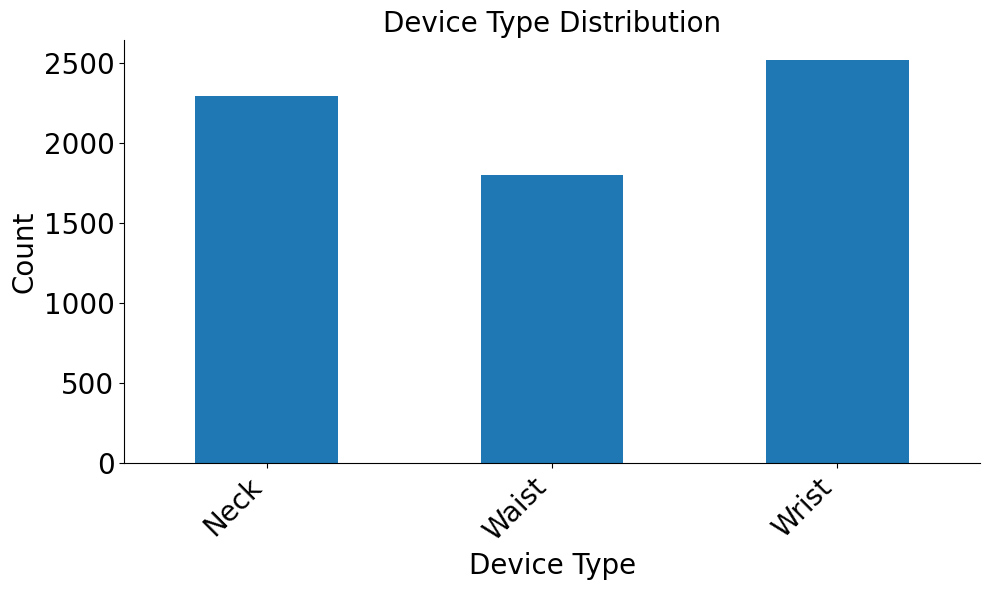

In [21]:
# prompt: visulize the device type distribution in one plot. no line on top or right, frameon=False for legend, fontsize=20 for all/

import matplotlib.pyplot as plt

# Assuming 'device_encoded' is your DataFrame with one-hot encoded device types
device_counts = device_encoded.sum()

plt.figure(figsize=(10, 6))
device_counts.plot(kind='bar')
plt.title('Device Type Distribution', fontsize=20)
plt.xlabel('Device Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=20, rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize legend (if needed, depending on how device_counts is structured)
plt.legend(frameon=False, fontsize=20)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_new_scaled = scaler.fit_transform(df_new.reshape(-1, df_new.shape[-1])).reshape(df_new.shape)
print(df_new_scaled[:5])

[[[ 6.57888602e-01  8.52861137e-02  1.80050045e-01  2.08662914e+00
    2.84227489e-01  9.23854167e-02]
  [ 6.58750848e-01  8.52861137e-02  1.55993282e-01  2.10336209e+00
    2.79048767e-01  8.76353198e-02]
  [ 6.58750848e-01  8.26875592e-02  1.29202797e-01  2.11365928e+00
    2.73870045e-01  8.13018572e-02]
  ...
  [ 5.93651222e-01  1.48171135e-01  1.40137689e-01 -7.32079156e-02
    5.80899579e-02 -1.52834473e-02]
  [ 5.94944592e-01  1.50249978e-01  1.44511646e-01 -7.06336163e-02
    5.63637173e-02 -1.05333503e-02]
  [ 5.99686949e-01  1.52328822e-01  1.46698624e-01 -7.19207660e-02
    5.63637173e-02 -1.21167160e-02]]

 [[ 5.91926728e-01  3.07164676e-02  3.10175260e-01 -6.29107186e-02
    3.04701069e-02 -1.03315643e-03]
  [ 5.91926728e-01  3.69529986e-02  3.18923174e-01 -7.19207660e-02
    2.87438662e-02 -5.78325338e-03]
  [ 5.92357852e-01  4.21501077e-02  3.25484109e-01 -7.44950652e-02
    1.83864220e-02 -4.19988773e-03]
  ...
  [ 5.81579768e-01  2.04299913e-01  1.35763732e-01 -7.32079

In [23]:
# Ensure device_encoded is a NumPy array
device_encoded = np.array(device_encoded)  # Convert from DataFrame/Series if needed

# Expand device_encoded along the timesteps dimension
device_expanded = np.repeat(device_encoded[:, np.newaxis], df_new_scaled.shape[1], axis=1)

# Ensure df_new is also a NumPy array
df_new_scaled_array = np.array(df_new_scaled)

# Concatenate along the last axis
X = np.concatenate([df_new_scaled_array, device_expanded], axis=2)

# Print the resulting shape
print(X[:5])
print(X.shape)


[[[ 0.6578886   0.08528611  0.18005004 ...  1.          0.
    0.        ]
  [ 0.65875085  0.08528611  0.15599328 ...  1.          0.
    0.        ]
  [ 0.65875085  0.08268756  0.1292028  ...  1.          0.
    0.        ]
  ...
  [ 0.59365122  0.14817113  0.14013769 ...  1.          0.
    0.        ]
  [ 0.59494459  0.15024998  0.14451165 ...  1.          0.
    0.        ]
  [ 0.59968695  0.15232882  0.14669862 ...  1.          0.
    0.        ]]

 [[ 0.59192673  0.03071647  0.31017526 ...  1.          0.
    0.        ]
  [ 0.59192673  0.036953    0.31892317 ...  1.          0.
    0.        ]
  [ 0.59235785  0.04215011  0.32548411 ...  1.          0.
    0.        ]
  ...
  [ 0.58157977  0.20429991  0.13576373 ...  1.          0.
    0.        ]
  [ 0.58157977  0.2037802   0.14068443 ...  1.          0.
    0.        ]
  [ 0.58330426  0.20533934  0.14505839 ...  1.          0.
    0.        ]]

 [[ 0.58373538  0.07749045  0.04172366 ...  1.          0.
    0.        ]
  [ 0.584

In [24]:
# Step 5: Split into Features and Labels
# Separate features (X) and target (y)
y = df['Label'].values                # Convert labels to NumPy array
print(X.shape)
print(y.shape)
print(X[:5])
print(y[:5])

(6605, 4760, 9)
(6605,)
[[[ 0.6578886   0.08528611  0.18005004 ...  1.          0.
    0.        ]
  [ 0.65875085  0.08528611  0.15599328 ...  1.          0.
    0.        ]
  [ 0.65875085  0.08268756  0.1292028  ...  1.          0.
    0.        ]
  ...
  [ 0.59365122  0.14817113  0.14013769 ...  1.          0.
    0.        ]
  [ 0.59494459  0.15024998  0.14451165 ...  1.          0.
    0.        ]
  [ 0.59968695  0.15232882  0.14669862 ...  1.          0.
    0.        ]]

 [[ 0.59192673  0.03071647  0.31017526 ...  1.          0.
    0.        ]
  [ 0.59192673  0.036953    0.31892317 ...  1.          0.
    0.        ]
  [ 0.59235785  0.04215011  0.32548411 ...  1.          0.
    0.        ]
  ...
  [ 0.58157977  0.20429991  0.13576373 ...  1.          0.
    0.        ]
  [ 0.58157977  0.2037802   0.14068443 ...  1.          0.
    0.        ]
  [ 0.58330426  0.20533934  0.14505839 ...  1.          0.
    0.        ]]

 [[ 0.58373538  0.07749045  0.04172366 ...  1.          0.
 

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val = X_test[:300]
# y_val = y_test[:300]
# X_test = X_test[300:]
# y_test = y_test[300:]
X_val = X_test[:900]
y_val = y_test[:900]
X_test = X_test[900:]
y_test = y_test[900:]

In [26]:
imbalance_ratio = np.sum(y_train == 1) / np.sum(y_train == 0)
print(f"Imbalanced Ratio: {imbalance_ratio:.2f}")

Imbalanced Ratio: 2.76


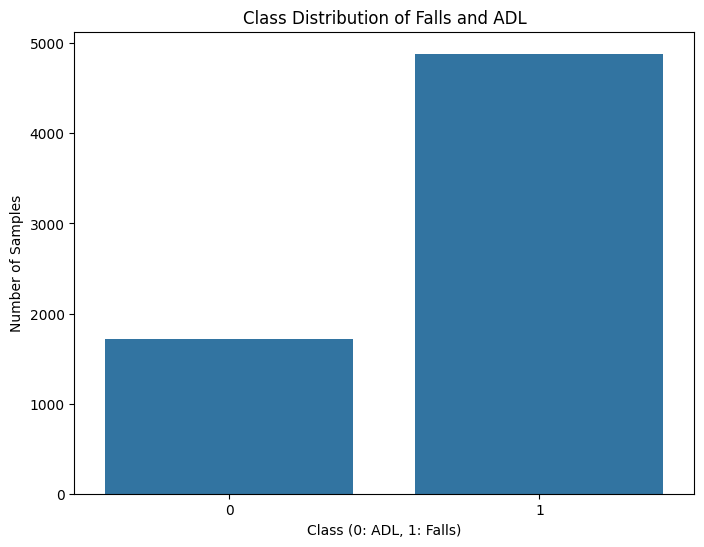

Class Distribution:
Label
1    4883
0    1722
Name: count, dtype: int64

Imbalanced Ratio (Train Set): 2.76


In [27]:
# prompt: write a code to visulize the imbalance of the dataset.

import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# Calculate the class distribution
class_counts = df['Label'].value_counts()

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Class Distribution of Falls and ADL')
plt.xlabel('Class (0: ADL, 1: Falls)')
plt.ylabel('Number of Samples')
plt.show()

# Print the class counts for better readability
print(f"Class Distribution:\n{class_counts}")

# Calculate and print the imbalance ratio (you already have this)
imbalance_ratio = np.sum(y_train == 1) / np.sum(y_train == 0)
print(f"\nImbalanced Ratio (Train Set): {imbalance_ratio:.2f}")

In [28]:
# prompt: print imbalance ratio for all 4 groups.

# Assuming you have your dataframes df, y_train, y_val, and y_test defined.
# Replace these with your actual dataframes if different.

# Calculate imbalance ratios for each dataset
def calculate_imbalance_ratio(labels):
    try:
        return np.sum(labels == 1) / np.sum(labels == 0)
    except ZeroDivisionError:
        return float('inf')  # Handle cases where there are no samples of class 0

imbalance_ratio_train = calculate_imbalance_ratio(y_train)
imbalance_ratio_val = calculate_imbalance_ratio(y_val)
imbalance_ratio_test = calculate_imbalance_ratio(y_test)
imbalance_ratio_total = calculate_imbalance_ratio(df['Label'])

print(f"\nImbalance Ratio (Total Dataset): {imbalance_ratio_total:.2f}")
print(f"Imbalance Ratio (Train Set): {imbalance_ratio_train:.2f}")
print(f"Imbalance Ratio (Validation Set): {imbalance_ratio_val:.2f}")
print(f"Imbalance Ratio (Test Set): {imbalance_ratio_test:.2f}")


Imbalance Ratio (Total Dataset): 2.84
Imbalance Ratio (Train Set): 2.76
Imbalance Ratio (Validation Set): 3.25
Imbalance Ratio (Test Set): 2.85


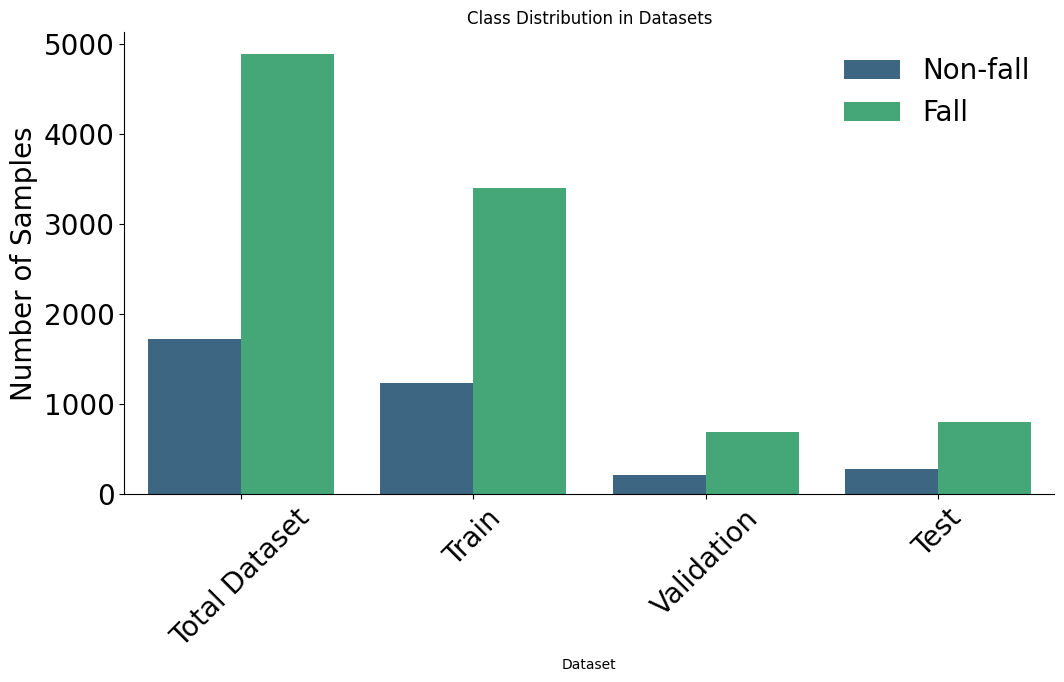

In [29]:
# prompt: remove the top and the right line of the plot, and the label '0' -> 'Non-fall', '1' -> 'fall'

# ... (your existing code) ...

# Assuming you have your dataframes df, y_train, y_val, and y_test defined.
# Replace these with your actual dataframes if different.

# Create a DataFrame for visualization
data_for_plot = pd.DataFrame({
    'Dataset': ['Total Dataset'] * len(df),
    'Label': df['Label']
})
data_for_plot = pd.concat([
    data_for_plot,
    pd.DataFrame({'Dataset': ['y_train'] * len(y_train), 'Label': y_train}),
    pd.DataFrame({'Dataset': ['y_val'] * len(y_val), 'Label': y_val}),
    pd.DataFrame({'Dataset': ['y_test'] * len(y_test), 'Label': y_test})
])


plt.figure(figsize=(12, 6))
sns.countplot(x='Dataset', hue='Label', data=data_for_plot, palette="viridis")
plt.title('Class Distribution in Datasets')
# plt.xlabel('Dataset',fontsize = 20 )
plt.ylabel('Number of Samples', fontsize = 20)
plt.xticks(rotation=45, fontsize = 20)  # Rotate x-axis labels for better readability

# Remove the top and right spines
sns.despine()

# Replace ticks
plt.xticks([0,1,2,3],['Total Dataset', 'Train', 'Validation', 'Test'], fontsize = 20)
plt.yticks(fontsize = 20)

# Change legend labels
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Non-fall', 'Fall']
plt.legend(handles, new_labels, loc='upper right', fontsize = 20, frameon = False)


plt.show()

# ... (rest of your code) ...

In [30]:
y_train = to_categorical(y_train)  # Class labels start from 0
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
# X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
# X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)

num_train = X_train.shape[0]
num_val = X_val.shape[0]
num_test = X_test.shape[0]

# Print the results
print(f"Number of training segments: {num_train}")
print(f"Number of validation segments: {num_val}")
print(f"Number of test segments: {num_test}")

Number of training segments: 4623
Number of validation segments: 900
Number of test segments: 1082


In [31]:
y_train.shape

(4623, 2)

In [32]:
X_train.shape[0]

4623

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4623, 4760, 9)
(1082, 4760, 9)
(4623, 2)
(1082, 2)


In [34]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [35]:
import psutil

def memory_usage():
    print(f"Used RAM: {psutil.virtual_memory().used / 1e9:.2f} GB")
    print(f"Available RAM: {psutil.virtual_memory().available / 1e9:.2f} GB")

memory_usage()


Used RAM: 13.59 GB
Available RAM: 343.25 GB


In [36]:
class_weight = {0: 1.0, 1: imbalance_ratio}

In [57]:
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers



def scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.5
    return lr

# Hyperparameter values for tuning
FILTERS = [16, 32, 64, 128, 256, 512, 1024]  # Number of filters
KERNEL_SIZES = 3            # Kernel sizes
BATCH_SIZE =  126                   # Batch size
EPOCHS = 41                        # Number of epochs
INPUT_SHAPE = (X_train.shape[1], X_train.shape[2])
NUM_CLASSES = y_train.shape[1]

# Function to create and compile the CNN model
def create_cnn_model(filters):
    """
    Creates a CNN model with specified hyperparameters.

    Args:
    input_shape (tuple): Shape of the input data (timesteps, features).
    filters (int): Number of filters in the convolutional layers.
    kernel_size (int): Kernel size for the Conv1D layers.

    Returns:
    model: Compiled CNN model.
    """

    #     # Initialize the TPU strategy
    # try:
    #     tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detect TPU
    #     tf.config.experimental_connect_to_cluster(tpu)
    #     tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)  # Create TPU strategy
    #     print("TPU initialized successfully")
    # except Exception as e:
    #     print("Error initializing TPU:", e)

    # Define the model inside the strategy scope
    with strategy.scope():
        # Create a simple model

        model = Sequential([
            Conv1D(filters=filters, kernel_size=KERNEL_SIZES, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=INPUT_SHAPE),
            MaxPooling1D(pool_size=2),
            Dropout(0.3),
            GlobalAveragePooling1D(),
            Dense(100, activation='relu'),
            Dense(NUM_CLASSES, activation='softmax')  # classification
            ])

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy

    return model

# Fine-tuning loop
results = []  # To store results of each configuration
  # (timesteps, features)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

history_list = []
for filters in FILTERS:
        print(f"Training with filters={filters}, kernel_size={KERNEL_SIZES}...")

        # Create the model with current hyperparameters
        model = create_cnn_model(filters)

        lr_scheduler = LearningRateScheduler(scheduler)

        # Train the model
        model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            callbacks=[lr_scheduler],
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            verbose=1,
            class_weight=class_weight
        )
        history = model.history
        history_list.append(history)

        # Evaluate the model
        val_accuracy = model.evaluate(X_val, y_val, verbose=0)[1]
        results.append((filters, val_accuracy))
        print(f"Validation accuracy with {filters} filters: {val_accuracy:.4f}")

print("\nValidation Accuracy for Different Filters:")
for filters, acc in results:
    print(f"Filters: {filters}, Validation Accuracy: {acc:.4f}")

# Convert results to a DataFrame for easy visualization
import pandas as pd
results_df = pd.DataFrame(results)

# Display results
# import ace_tools as tools; tools.display_dataframe_to_user(name="Hyperparameter Tuning Results", dataframe=results_df)


Training with filters=16, kernel_size=3...
Epoch 1/41
37/37 [==============================] - 12s 195ms/step - loss: 1.1326 - accuracy: 0.7192 - val_loss: 0.6207 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 2/41
37/37 [==============================] - 2s 68ms/step - loss: 0.8064 - accuracy: 0.7342 - val_loss: 0.5553 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 3/41
37/37 [==============================] - 3s 69ms/step - loss: 0.7309 - accuracy: 0.7342 - val_loss: 0.5066 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 4/41
37/37 [==============================] - 2s 67ms/step - loss: 0.6819 - accuracy: 0.7342 - val_loss: 0.4834 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 5/41
37/37 [==============================] - 3s 73ms/step - loss: 0.6508 - accuracy: 0.7342 - val_loss: 0.4712 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 6/41
37/37 [==============================] - 3s 69ms/step - loss: 0.6282 - accuracy: 0.7342 - val_loss: 0.4417 - val_accuracy: 0.7644 - lr: 0.0010
Epoch 7/41
37/37 [=============

Best epoch: 41


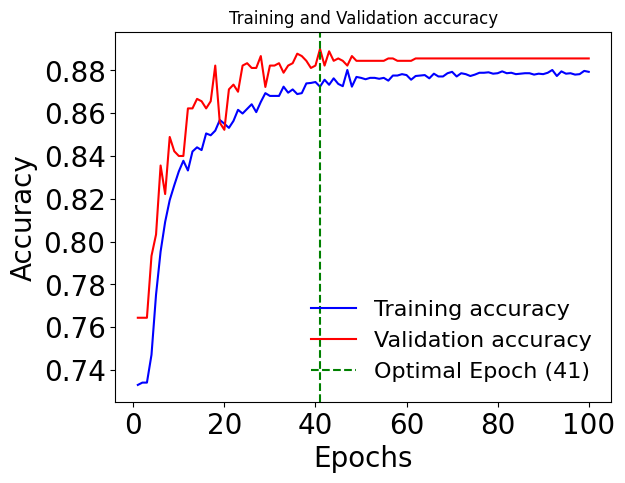

In [56]:
# prompt: the optimal number of epochs

import matplotlib.pyplot as plt

# Assuming 'history_list' contains the training history from each model.fit call
#  history = model.fit(...)

# Example history (replace with your actual history object)

for history in history_list:
    # Find the epoch with the highest validation accuracy
    best_epoch = np.argmax(history.history['val_accuracy']) + 1  # Add 1 because epochs start from 1

    print(f"Best epoch: {best_epoch}")

    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.plot(epochs, history.history['accuracy'], 'b', label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
    plt.axvline(x=best_epoch, color='g', linestyle='--', label=f'Optimal Epoch ({best_epoch})') # Add vertical line for best epoch
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.legend(fontsize=16, frameon=False)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

In [49]:
for history in history_list:
    print(history.history)

{'loss': [0.882301926612854, 0.6722776889801025, 0.6091787815093994, 0.5763140916824341, 0.5507882833480835, 0.530210554599762, 0.513534426689148, 0.49790096282958984, 0.4871574938297272, 0.4766997992992401, 0.46448785066604614, 0.4574649930000305, 0.4527093470096588, 0.4489310383796692, 0.4439570903778076, 0.43863606452941895, 0.4343547821044922, 0.4289741814136505, 0.42568594217300415, 0.42616599798202515, 0.4167350232601166, 0.41252827644348145, 0.41043907403945923, 0.4084639251232147, 0.40687814354896545, 0.40401124954223633, 0.4054604768753052, 0.3996158838272095, 0.396054208278656, 0.3948649764060974, 0.39215391874313354, 0.39073771238327026, 0.3897443413734436, 0.3883381187915802, 0.3883664906024933, 0.38693785667419434, 0.3858221173286438, 0.38510453701019287, 0.3828325569629669, 0.3823263347148895, 0.3812080919742584, 0.3804669976234436, 0.37954843044281006, 0.3790982663631439, 0.37877318263053894, 0.3787004351615906, 0.37802907824516296, 0.3769316077232361, 0.3768469393253326

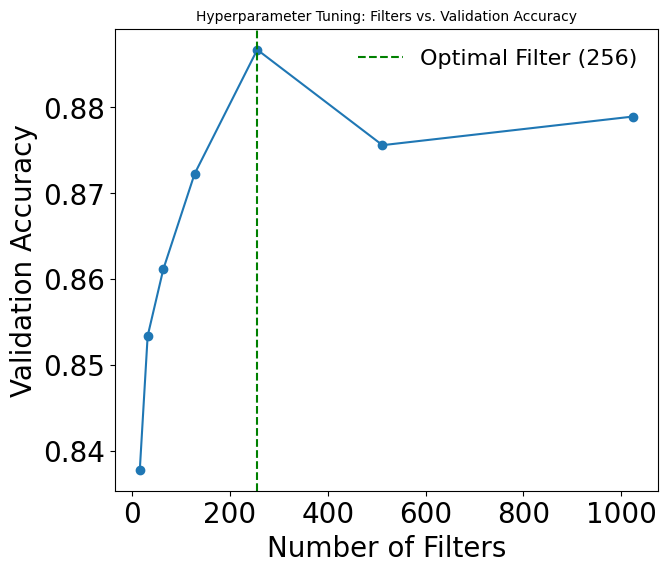

In [64]:
# prompt: visualize the hyperparameter tuning process - filter, KERNEL_SIZES, epochs, etc. with plots.

import matplotlib.pyplot as plt

# Assuming 'results' is a list of tuples (filters, val_accuracy) from your code
# Example results (replace with your actual results)
# results = [(32, 0.85), (64, 0.88), (128, 0.90), (256, 0.89)]

# Create the plot
optimal_filters = max(results, key=lambda x: x[1])[0]
plt.figure(figsize=(7, 6))
plt.plot(results_df[0], results_df[1], marker='o')
plt.axvline(x=optimal_filters, color='g', linestyle='--', label=f'Optimal Filter ({optimal_filters})') # Add vertical line for best epoch


# Customize the plot
plt.title('Hyperparameter Tuning: Filters vs. Validation Accuracy', fontsize=10)
plt.xlabel('Number of Filters', fontsize=20)
plt.ylabel('Validation Accuracy', fontsize=20)
# plt.grid(True)
plt.legend(fontsize=16, frameon=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [65]:
optimal_filters = max(results, key=lambda x: x[1])[0]
print(f"The optimal number of filters is: {optimal_filters}")

The optimal number of filters is: 256


In [66]:
# Build and train final model
final_model = create_cnn_model(optimal_filters)
final_model.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]),
                batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

# Evaluate on the final test set
test_predictions = final_model.predict(X_test)
y_pred_classes = np.argmax(test_predictions, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
# # Evaluation matrics per output class
# output_labels = ['Fall', 'ADL']

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))



Epoch 1/41
44/44 [==============================] - 8s 90ms/step - loss: 0.4929 - accuracy: 0.7691
Epoch 2/41
44/44 [==============================] - 2s 44ms/step - loss: 0.3959 - accuracy: 0.8150
Epoch 3/41
44/44 [==============================] - 2s 44ms/step - loss: 0.3628 - accuracy: 0.8448
Epoch 4/41
44/44 [==============================] - 2s 49ms/step - loss: 0.3463 - accuracy: 0.8524
Epoch 5/41
44/44 [==============================] - 2s 41ms/step - loss: 0.3292 - accuracy: 0.8642
Epoch 6/41
44/44 [==============================] - 2s 42ms/step - loss: 0.3149 - accuracy: 0.8709
Epoch 7/41
44/44 [==============================] - 2s 42ms/step - loss: 0.3105 - accuracy: 0.8713
Epoch 8/41
44/44 [==============================] - 2s 42ms/step - loss: 0.3009 - accuracy: 0.8781
Epoch 9/41
44/44 [==============================] - 2s 42ms/step - loss: 0.2911 - accuracy: 0.8832
Epoch 10/41
44/44 [==============================] - 2s 42ms/step - loss: 0.2856 - accuracy: 0.8867
Epoch 11/

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[238  43]
 [ 47 754]]
